In [3]:
%load_ext autoreload
%autoreload 2

from scalable_gps.configs.default import get_config
import scalable_gps.kernels as kernels
from scalable_gps.data import get_dataset
from scalable_gps.utils import (
    ExactPredictionsTuple,
    HparamsTuple,
    flatten_nested_dict,
    get_clustered_indices,
    get_tuned_hparams,
    setup_training,
    update_config_dict,
)
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [30]:
datasets = ["pol", "elevators", "bike"]

In [31]:
eigvals = {}
for dataset in datasets:
    config = get_config(dataset)
    train_ds, test_ds = get_dataset(config.dataset_name, **config.dataset_config)
    hparams = get_tuned_hparams(config.dataset_name, config.dataset_config.split)

    if config.override_noise_scale > 0.0:
        hparams = HparamsTuple(
            length_scale=hparams.length_scale,
            signal_scale=hparams.signal_scale,
            noise_scale=config.override_noise_scale,
        )

    print(hparams)

    # Initialise Kernel
    kernel_init_fn = getattr(kernels, config.kernel_name)
    kernel = kernel_init_fn(
        {"signal_scale": hparams.signal_scale, "length_scale": hparams.length_scale}
    )

    K = kernel.kernel_fn(train_ds.x, train_ds.x)
    eigvals[dataset] = jnp.linalg.eigvalsh(K)


pol dataset, N=15000, d=26
HparamsTuple(noise_scale=0.03674088791012764, signal_scale=0.40082889795303345, length_scale=Array([ 0.52524596,  0.6186301 ,  1.5090247 , 10.132918  ,  1.7406912 ,
        5.054395  ,  5.226383  ,  9.337141  , 10.217203  ,  6.5755534 ,
        3.6486707 ,  3.0318773 ,  5.2058926 ,  8.490589  ,  7.535358  ,
        3.3828075 ,  7.956833  ,  9.567045  ,  9.314897  ,  9.894369  ,
        9.533345  , 10.515911  , 10.594195  ,  5.8728833 ,  7.5082574 ,
        4.9715824 ], dtype=float32))
elevators dataset, N=16599, d=18
HparamsTuple(noise_scale=0.31428033113479614, signal_scale=0.7083656191825867, length_scale=Array([5.4684825, 6.7224174, 5.2293878, 6.4529595, 6.8570247, 1.2667023,
       6.6950006, 1.4319718, 8.193832 , 1.9280398, 3.4436643, 3.443688 ,
       1.2175884, 7.483958 , 0.6931472, 8.495348 , 0.6931472, 1.2171123],      dtype=float32))
bike dataset, N=17379, d=17
HparamsTuple(noise_scale=0.0062471856363117695, signal_scale=0.1614370346069336, length_s

In [6]:
import jax
import jax.numpy as jnp





In [9]:
print(eigvals[0].shape, eigvals[1].shape)

(15642,) (15642, 15642)


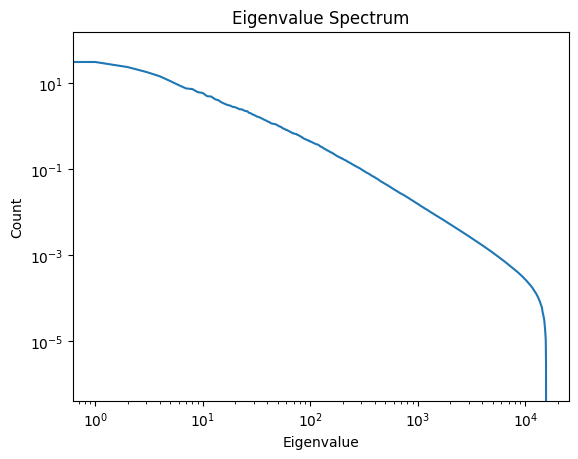

In [22]:
plt.plot(jnp.sort(eigvals[0])[::-1])
plt.xlabel('Eigenvalue')
plt.ylabel('Count')
plt.title('Eigenvalue Spectrum')
plt.xscale('log')
plt.yscale('log')
# plt.xlim([1e-6, 0.5])
plt.show()